In [2]:
import requests
import json
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

## CENSUS Block Group

In [22]:
fips = gpd.read_file('../data/cb_2021_47_bg_500k/cb_2021_47_bg_500k.shp')

In [23]:
davidson_fips = fips.loc[fips['COUNTYFP'] == '037']

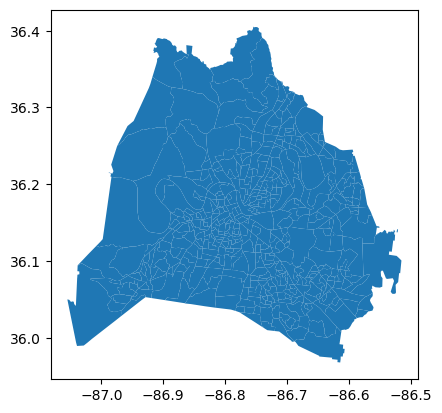

In [22]:
davidson_fips.plot();

In [207]:
davidson_fips['TRACTCE'].unique()

array(['010401', '017100', '015622', '010501', '011002', '019501',
       '014300', '010601', '016400', '011200', '019121', '015623',
       '019200', '015502', '014200', '011400', '012200', '015637',
       '015630', '011800', '016700', '015629', '019008', '016200',
       '018902', '019110', '019502', '018000', '011700', '017300',
       '015614', '017901', '013300', '012801', '015401', '018101',
       '018204', '015632', '017702', '015628', '015625', '015636',
       '018205', '013600', '017402', '010404', '018804', '019007',
       '018412', '010303', '019105', '016600', '018404', '019116',
       '015805', '010502', '013800', '016500', '011300', '011100',
       '014800', '018201', '012802', '013400', '018801', '018602',
       '011001', '010901', '010802', '010701', '010602', '012701',
       '019108', '015618', '016800', '011500', '018901', '011600',
       '015501', '019004', '015619', '015402', '019115', '015626',
       '015609', '015804', '017800', '018203', '012600', '0161

In [76]:
davidson_fips = davidson_fips[['GEOID', 'geometry']]

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry
8,47,037,010401,2,1500000US470370104012,470370104012,2,Block Group 2,BG,1975643,0,"POLYGON ((-86.71021 36.27686, -86.70972 36.279..."
19,47,037,017100,1,1500000US470370171001,470370171001,1,Block Group 1,BG,338756,0,"POLYGON ((-86.78309 36.12758, -86.78244 36.127..."
22,47,037,015622,2,1500000US470370156222,470370156222,2,Block Group 2,BG,2512816,0,"POLYGON ((-86.59370 36.18623, -86.59254 36.192..."
28,47,037,010501,3,1500000US470370105013,470370105013,3,Block Group 3,BG,538710,0,"POLYGON ((-86.64974 36.25751, -86.64311 36.257..."
33,47,037,011002,1,1500000US470370110021,470370110021,1,Block Group 1,BG,1261699,0,"POLYGON ((-86.74717 36.23345, -86.74219 36.238..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4488,47,037,019116,1,1500000US470370191161,470370191161,1,Block Group 1,BG,3849000,0,"POLYGON ((-86.74355 36.03443, -86.74351 36.040..."
4501,47,037,011001,1,1500000US470370110011,470370110011,1,Block Group 1,BG,815331,0,"POLYGON ((-86.76618 36.20972, -86.76574 36.210..."
4502,47,037,015613,1,1500000US470370156131,470370156131,1,Block Group 1,BG,3093566,0,"POLYGON ((-86.71141 36.10133, -86.70928 36.099..."
4503,47,037,010403,1,1500000US470370104031,470370104031,1,Block Group 1,BG,995189,0,"POLYGON ((-86.70448 36.26374, -86.70374 36.266..."


In [75]:
davidson_fips.to_csv('../data/davidson_fips.csv')

## Metro Parks Boundaries API
Metro park API offered by https://data.nashville.gov/

In [51]:
# Variables for API
select = 'select=the_geom,name,common_nam,year_estab,status,acres'
limit = '&$limit=50000'

# endpoint
query_url = f'https://data.nashville.gov/resource/544k-ba3u.geojson?${select}{limit}'

In [52]:
# create gdf
parks = gpd.read_file(query_url)

In [53]:
# Clean up dataframe
parks = parks[['name', 'common_nam', 'year_estab', 'status', 'acres', 'geometry']]

In [55]:
parks

,name,common_nam,year_estab,status,acres,geometry
0,Harpeth River Park,Harpeth River,1988,PARK,69.86,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,Harpeth Knoll Park,Harpeth Knoll,1972,PARK,9.88,"MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,Bellevue Park,Red Caboose,1982,PARK,17.14,"MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,Bells Bend Park,Bells Bend,2007,PARK,809.59,"MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,Alvin G. Beaman Park,Beaman,1996,PARK,2168.792,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."
...,...,...,...,...,...,...
282,None,Stones River Greenway - Lebanon Pk to Dam,2003,GW,3.7454340524,"MULTIPOLYGON (((-86.62732 36.16291, -86.62669 ..."
283,None,Stones River Greenway - Alta Lake,2000,GW,1.46849965739,"MULTIPOLYGON (((-86.60819 36.16592, -86.60817 ..."
284,None,Stones River Greenway - Lebanon Pk to Dam,2003,GW,0.181880190971,"MULTIPOLYGON (((-86.64052 36.17177, -86.64067 ..."
285,None,Whites Creek Community Garden,2014,PARK,7.30424931138,"MULTIPOLYGON (((-86.82873 36.25082, -86.82857 ..."


In [73]:
parks.to_csv('../data/parks.csv')

## Spaital Join BG + Parks Boundaries

In [56]:
davidson_fips = davidson_fips.set_crs(epsg = 4326, allow_override = True)

In [57]:
parks_to_fips = gpd.sjoin(parks, davidson_fips, op = 'intersects')

In [62]:
parks_to_fips = parks_to_fips\
    .reset_index()\
    .rename(columns = {'index' : 'park_no'})\
    [['park_no', 'GEOID']]

In [67]:
parks_to_fips

,park_no,GEOID
0,0,470370184092
1,1,470370184052
2,5,470370184052
3,235,470370184052
4,236,470370184052
...,...,...
351,280,470370155011
352,281,470370155011
353,282,470370155011
354,284,470370155011


In [72]:
parks_to_fips.value_counts('park_no').reset_index().rename(columns = {0 : 'count'})

,park_no,count
0,81,4
1,82,4
2,5,4
3,262,4
4,7,4
...,...,...
282,118,1
283,119,1
284,120,1
285,121,1


In [74]:
parks_to_fips.to_csv('../data/davidson_fips_park.csv')

## American Community Survey 5-Year API

In [9]:
# API key
with open('api_key.json') as fi:
    credentials = json.load(fi)

In [ ]:
B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B02001_009E,B02001_010E



In [249]:
# API
census_api_key = '&key=' + credentials['census']
host = 'https://api.census.gov/data'
dataset = '/acs/acs5'
location = '&for=block%20group:*&in=state:47&in=county:037&in=tract:*'

# Variables
variables = 'B25038_001E,B25038_002E,B25038_003E,B25038_004E,B25038_005E,B25038_006E,B25038_007E,B25038_008E,B25038_009E,B25038_010E,B25038_011E,B25038_012E,B25038_013E,B25038_014E,B25038_015E'

# create empty df
res_df = pd.DataFrame()

# for loop to get acs 5-years data from 2013 to 2020
for y in range(2013, 2021+1) :
    
    # query
    query_url = f"{host}/{y}{dataset}?get={variables}{location}{census_api_key}"

    # get response and create df
    response = requests.get(query_url)
    temp_df = pd.DataFrame(response.json())

    # clean-up
    temp_df.columns = temp_df.iloc[0]
    temp_df = temp_df[1:]
    temp_df['year'] = y
    temp_df['geoid'] = temp_df['state'].str.cat(temp_df[['county', 'tract', 'block group']])
    temp_df = temp_df.drop(columns = ['state', 'county', 'tract', 'block group'])
    
    # add temp_df to res_df
    res_df = pd.concat([res_df, temp_df])
    
    print(y)

response

2013
2014
2015
2016
2017
2018
2019
2020
2021


<Response [200]>

In [253]:
res_df.loc[res_df['geoid'].str.contains('10103')]

,B25038_001E,B25038_002E,B25038_003E,B25038_004E,B25038_005E,B25038_006E,B25038_007E,B25038_008E,B25038_009E,B25038_010E,B25038_011E,B25038_012E,B25038_013E,B25038_014E,B25038_015E,year,geoid
243,339,251,18,110,38,42,25,18,88,6,82,0,0,0,0,2013,470370101031
244,573,479,47,164,96,74,93,5,94,8,77,9,0,0,0,2013,470370101032
39,361,289,37,120,71,30,27,4,72,35,37,0,0,0,0,2014,470370101031
40,617,514,51,197,107,76,78,5,103,10,81,12,0,0,0,2014,470370101032
211,352,313,0,50,98,66,47,52,39,0,35,0,4,0,0,2015,470370101031
412,636,534,4,47,185,137,71,90,102,0,29,68,5,0,0,2015,470370101032
325,382,328,0,83,68,66,60,51,54,3,42,5,4,0,0,2016,470370101031
356,611,561,5,53,172,160,88,83,50,0,31,12,7,0,0,2016,470370101032
10,426,367,5,65,103,80,67,47,59,10,39,5,5,0,0,2017,470370101031
11,571,512,5,63,147,141,88,68,59,5,36,10,8,0,0,2017,470370101032


In [143]:
res_df.to_csv('../data/move.csv')

## Variables list

In [243]:
# get variables.json file
endpoint = 'https://api.census.gov/data/2021/acs/acs5/variables.json'
response = requests.get(endpoint)

# convert json to df
variables_list = response.json()
variables_list = pd.DataFrame(variables_list['variables']).transpose().reset_index()

# cleanup
variables_list['group'] = variables_list['index'].str[:3]
variables_list = variables_list\
    [['group', 'index', 'label', 'concept', 'predicateType', 'limit', 'attributes']]

In [20]:
variables_list.loc[variables_list['label'].str.contains('geo')]

,group,index,label,concept,predicateType,limit,attributes
251,B24,B24121_097E,Estimate!!Total:!!Mining and geological engine...,DETAILED OCCUPATION BY MEDIAN EARNINGS IN THE ...,int,0,"B24121_097EA,B24121_097M,B24121_097MA"
1287,B24,B24125_206E,Estimate!!Total:!!Surgeons,"DETAILED OCCUPATION FOR THE FULL-TIME, YEAR-RO...",int,0,"B24125_206EA,B24125_206M,B24125_206MA"
1611,B24,B24126_097E,Estimate!!Total:!!Mining and geological engine...,"DETAILED OCCUPATION FOR THE FULL-TIME, YEAR-RO...",int,0,"B24126_097EA,B24126_097M,B24126_097MA"
4578,B24,B24125_128E,Estimate!!Total:!!Environmental science and ge...,"DETAILED OCCUPATION FOR THE FULL-TIME, YEAR-RO...",int,0,"B24125_128EA,B24125_128M,B24125_128MA"
4679,B24,B24125_115E,Estimate!!Total:!!Geoscientists and hydrologis...,"DETAILED OCCUPATION FOR THE FULL-TIME, YEAR-RO...",int,0,"B24125_115EA,B24125_115M,B24125_115MA"
5485,B24,B24124_206E,Estimate!!Total:!!Surgeons,"DETAILED OCCUPATION FOR THE FULL-TIME, YEAR-RO...",int,0,"B24124_206EA,B24124_206M,B24124_206MA"
5847,B24,B24125_097E,Estimate!!Total:!!Mining and geological engine...,"DETAILED OCCUPATION FOR THE FULL-TIME, YEAR-RO...",int,0,"B24125_097EA,B24125_097M,B24125_097MA"
6676,B24,B24126_206E,Estimate!!Total:!!Surgeons,"DETAILED OCCUPATION FOR THE FULL-TIME, YEAR-RO...",int,0,"B24126_206EA,B24126_206M,B24126_206MA"
7378,B99,B99081_003E,Estimate!!Total:!!Allocated:!!One or more but ...,ALLOCATION OF PLACE OF WORK,int,0,B99081_003EA
7382,B99,B99081_004E,Estimate!!Total:!!Allocated:!!All geographic p...,ALLOCATION OF PLACE OF WORK,int,0,B99081_004EA


In [42]:
# 1st row of each groups
variables_cat = variables_list\
    .sort_values('index')\
    .groupby('group').nth(0)

race

In [244]:
variables_list_movedin = variables_list\
    .loc[(variables_list['group'] == 'B25')]\
    [['index','label']]

In [246]:
variables_list_movedin.sort_values('index').to_csv('assdf.csv')

In [239]:
variables_list_movedin

27055     B25001_001E
4921      B25002_001E
4924      B25002_002E
4929      B25002_003E
25785    B25003A_001E
             ...     
15018     B25135_002E
15014     B25135_003E
14981     B25135_004E
14978     B25135_005E
14986     B25135_006E
Name: index, Length: 2241, dtype: object

In [234]:
variables_list_movedin.loc[variables_list_movedin['index'].str.contains('B25038')].to_csv('asd.csv')

In [ ]:
Housing units with a mortgage
Housing units without a mortgage

B25027_001E
B25027_002E
B25027_003E
B25027_004E
B25027_005E
B25027_006E
B25027_007E
B25027_008E
B25027_009E
B25027_010E
B25027_011E
B25027_012E
B25027_013E
B25027_014E
B25027_015E
B25027_016E
B25027_017E


In [ ]:
Estimate!!Total population in occupied housing units:!!Owner occupied:
Estimate!!Total population in occupied housing units:!!Renter occupied:

B25026_001E
B25026_002E
B25026_003E
B25026_004E
B25026_005E
B25026_006E
B25026_007E
B25026_008E
B25026_009E
B25026_010E
B25026_011E
B25026_012E
B25026_013E
B25026_014E
B25026_015E


In [ ]:
B25032_002E	Estimate!!Total:!!Owner-occupied housing units:
B25032_003E	Estimate!!Total:!!Owner-occupied housing units:!!1, detached
B25032_004E	Estimate!!Total:!!Owner-occupied housing units:!!1, attached
B25032_005E	Estimate!!Total:!!Owner-occupied housing units:!!2
B25032_006E	Estimate!!Total:!!Owner-occupied housing units:!!3 or 4
B25032_007E	Estimate!!Total:!!Owner-occupied housing units:!!5 to 9
B25032_008E	Estimate!!Total:!!Owner-occupied housing units:!!10 to 19
B25032_009E	Estimate!!Total:!!Owner-occupied housing units:!!20 to 49
B25032_010E	Estimate!!Total:!!Owner-occupied housing units:!!50 or more
B25032_011E	Estimate!!Total:!!Owner-occupied housing units:!!Mobile home
B25032_012E	Estimate!!Total:!!Owner-occupied housing units:!!Boat, RV, van, etc.
B25032_013E	Estimate!!Total:!!Renter-occupied housing units:
B25032_014E	Estimate!!Total:!!Renter-occupied housing units:!!1, detached
B25032_015E	Estimate!!Total:!!Renter-occupied housing units:!!1, attached
B25032_016E	Estimate!!Total:!!Renter-occupied housing units:!!2
B25032_017E	Estimate!!Total:!!Renter-occupied housing units:!!3 or 4
B25032_018E	Estimate!!Total:!!Renter-occupied housing units:!!5 to 9
B25032_019E	Estimate!!Total:!!Renter-occupied housing units:!!10 to 19
B25032_020E	Estimate!!Total:!!Renter-occupied housing units:!!20 to 49
B25032_021E	Estimate!!Total:!!Renter-occupied housing units:!!50 or more
B25032_022E	Estimate!!Total:!!Renter-occupied housing units:!!Mobile home
B25032_023E	Estimate!!Total:!!Renter-occupied housing units:!!Boat, RV, van, etc.

        
B25032_002E
B25032_003E
B25032_004E
B25032_005E
B25032_006E
B25032_007E
B25032_008E
B25032_009E
B25032_010E
B25032_011E
B25032_012E
B25032_013E
B25032_014E
B25032_015E
B25032_016E
B25032_017E
B25032_018E
B25032_019E
B25032_020E
B25032_021E
B25032_022E
B25032_023E
